In [1]:
import nltk
from os import getcwd

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\naray\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [5]:
from nltk.corpus import twitter_samples

In [6]:
pos = twitter_samples.strings('positive_tweets.json')

In [7]:
pos[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [8]:
neg = twitter_samples.strings('negative_tweets.json')

In [9]:
neg[0]

'hopeless for tmr :('

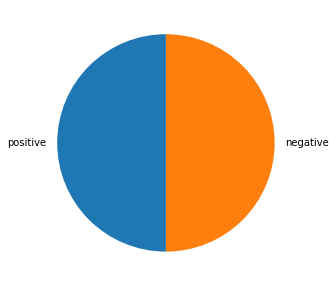

In [10]:
plt.figure(figsize=(5,5))
labels = ['positive','negative']
sizes=[len(pos),len(neg)]
plt.pie(sizes,labels=labels,startangle = 90)
plt.show()

In [11]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


In [12]:
def tokenize_string(tweet):
    
    '''preprocesses the texts and stems and tokenizes the string'''
    tweet2 = re.sub(r'^RT[\s]+', '', tweet)
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet2)
    tweet2 = re.sub(r'#','',tweet2)
    
    tokenizer = TweetTokenizer(preserve_case = False,strip_handles=True,reduce_len=True)
    
    tokens = tokenizer.tokenize(tweet2)
    
    stop_words = stopwords.words('english')
    
    punctuation = string.punctuation
    
    clean_tokens = []
    for i in tokens:
        if (i not in stop_words and i not in punctuation):
            clean_tokens.append(i)
            
    stemmed_tokens = []
    stemmer = PorterStemmer()
    for i in clean_tokens:
        stemmed_word = stemmer.stem(i)
        stemmed_tokens.append(stemmed_word)
    return stemmed_tokens

    

In [13]:
tweet = pos[random.randint(0,500)]

In [14]:
tweet

'@grannaHarmony fback :) indo harmos'

In [15]:
# set(tokenize(tweet))

In [16]:
labels = np.append(np.ones(len(pos)),np.zeros(len(neg)))

In [17]:
l = labels.squeeze()

In [18]:
def build_freqs(tweets,ys):
    
    label = np.squeeze(ys).tolist()
    freqs = {}
    for x,y in zip(tweets,label):
        for z in tokenize_string(x):
            
            pair= (z,y)
            if pair not in freqs:
                freqs[pair] = 1
            else:
                freqs[pair]+=1
            
    return freqs

In [19]:
tweets = pos + neg

In [20]:
tokenize_string(tweets[3])

['congrat', ':)']

In [21]:
tweets[3]


'@97sides CONGRATS :)'

In [22]:
frequency_dict = build_freqs(tweets,labels)

In [23]:
len(frequency_dict)

13066

In [24]:
keys = [list(x)[0] for x in list(frequency_dict.keys())]

In [25]:
p = set(keys)

In [26]:
data = []
for key in list(p):
    
    positive = 0
    negative = 0
    
    if (key,1) in frequency_dict:
        positive = frequency_dict[(key,1)]
    if (key,0) in frequency_dict:
        negative = frequency_dict[(key,0)]
    
    data.append([key,positive,negative])


In [27]:
data

[['johnni', 1, 0],
 ['ppl', 2, 5],
 ['doin', 0, 3],
 ['etdi', 1, 0],
 ['notic', 11, 26],
 ['upset', 1, 11],
 ['lwwf', 1, 0],
 ['sing', 5, 5],
 ['25', 1, 3],
 ['sosweet', 1, 0],
 ['pamela', 0, 1],
 ['ocean', 0, 4],
 ['k', 9, 9],
 ['blight', 0, 1],
 ['asid', 1, 0],
 ['suggest', 6, 2],
 ['bff', 4, 2],
 ["w'end", 0, 1],
 ['mint', 1, 0],
 ['stud', 0, 1],
 ['mega', 4, 1],
 ['stori', 11, 13],
 ['hoya', 0, 3],
 ['heechul', 1, 0],
 ['webcamsex', 0, 4],
 ['transmiss', 0, 1],
 ['cumbria', 1, 0],
 ['chenab', 1, 0],
 ['celebratio', 1, 0],
 ['dearli', 0, 1],
 ['slash', 0, 1],
 ['quot', 6, 6],
 ['🍷', 2, 0],
 ['socialreward', 0, 1],
 ['dipsatch', 1, 0],
 ['waffl', 0, 1],
 ['free', 37, 19],
 ['thoughtfortheday', 1, 0],
 ['promis', 6, 4],
 ['datz', 1, 0],
 ['none', 1, 4],
 ['cretaperfectsuv', 2, 0],
 ['unlov', 0, 1],
 ['the_madstork', 1, 0],
 ['refer', 1, 0],
 ['kansai', 1, 0],
 ['destin', 0, 1],
 ['comput', 5, 6],
 ['lime', 0, 1],
 ['weav', 0, 2],
 ['outta', 1, 1],
 ['tara', 3, 0],
 ['harmo', 1, 0],
 [

In [48]:
# fig,ax = plt.subplots(figsize=(8,8))

# x = np.log([x[1] for x in data])

# y = np.log([x[2] for x in data])

# plt.scatter(x,y)

# plt.xlabel("Log Positive count")
# plt.ylabel("Log Negative count")

# # Add the word as the label at the same position as you added the points just before
# for i in range(0, len(data)):
#     ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

# ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
# plt.show()

In [29]:
train_pos = pos[:4000]
train_neg = neg[:4000]
test_pos = pos[4000:]
test_neg = neg[4000:]

train_x = train_pos + train_neg

test_x = test_pos + test_neg

In [30]:
len(train_x),len(test_x)

(8000, 2000)

In [31]:
train_y = np.append(np.ones((len(train_pos),1)),np.zeros((len(train_neg),1)),axis=0)
test_y = np.append(np.ones((len(test_pos),1)),np.zeros((len(test_neg),1)),axis=0)

In [32]:
train_y.shape,test_y.shape

((8000, 1), (2000, 1))

In [33]:
freqs = build_freqs(train_x,train_y)

In [34]:
len(freqs)

11339

In [35]:
print('this is an example of positive tweet',train_x[0])
print('this is an example of processed tweet',tokenize_string(train_x[0]))

this is an example of positive tweet #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
this is an example of processed tweet ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [36]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [37]:
# # Testing your function 
# if (sigmoid(0) == 0.5):
#     print('SUCCESS!')
# else:
#     print('Oops!')

# if (sigmoid(4.92) == 0.9927537604041685):
#     print('CORRECT!')
# else:
#     print('Oops again!')

In [38]:
def gradient_descent(x,y,theta,alpha,num_iters):
    m = x.shape[0]
    
    for i in range(num_iters):
        
        z = np.dot(x,theta)
        
        h = sigmoid(z)
        
        j = -(float(1)/m)*(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))
        
        theta = theta-(alpha/m)*(np.dot(x.T,(h-y)))
    j = float(j)
    
    return j,theta
        

In [39]:
def feature_extract(tweets,freq):
    word_l = tokenize_string(tweets)
    
    x = np.zeros((1,3))
    
    x[0,0] = 1
    
    for word in word_l:
        
        x[0,1] += freq.get((word,1),0)
        
        x[0,2] += freq.get((word,0),0)
        
    return x


In [40]:
features = feature_extract(train_x[0],freqs)

In [41]:
features

array([[1.00e+00, 3.02e+03, 6.10e+01]])

In [42]:
X = np.zeros((len(train_x),3))

for i in range(len(train_x)):
    
    X[i,:] = feature_extract(train_x[i],freqs)
Y = train_y

J,theta = gradient_descent(X,Y,np.zeros((3,1)),1e-9,1500)

print(f'cost fucntion is {J:.8}')

print(f'parameters are as follows {[round(x,8) for x in theta.squeeze()]}')

cost fucntion is 0.24216529
parameters are as follows [7e-08, 0.0005239, -0.00055517]


In [43]:
def predict_tweet(tweets,freq,theta):
    
    x = feature_extract(tweets,freq)
    
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred

In [49]:
something = ' hate you'

print('positive' if predict_tweet(something,freqs,theta)>=0.5 else 'negative')

negative


In [50]:
def test_model(test_x,test_y,freq,theta,):
    predictions = []
    
    for i in test_x:
        pred = predict_tweet(i,freq,theta)
        if pred >=0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    accuracy = sum((np.array(predictions) == test_y.squeeze()).astype('int32'))/test_y.shape[0]
    
    return str(accuracy*100)+'%'
    

In [51]:
test_model(test_x,test_y,freqs,theta)

'99.5%'

In [52]:
purple = input()

if predict_tweet(purple,freqs,theta)>=0.5:
    print('positive')
else:
    print('negative')

hi i love you
positive
